# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


### Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [9, 6]

In [ ]:
try:
    df = pd.read_csv('C:\\обучение\\ЯП\\Модуль 1\\Итоговый проект\\games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В столбах `name` и `genre` по 2 пропуска, можем безболезненно удалить эти строки

In [ ]:
df = df.dropna(subset=['name', 'genre'])

In [ ]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Количество явных дубликатов

In [ ]:
df.duplicated().sum()

0

### Рассмотрим `platform`

In [ ]:
df_platform = df.groupby('platform')['platform'].count().sort_values(ascending=False)

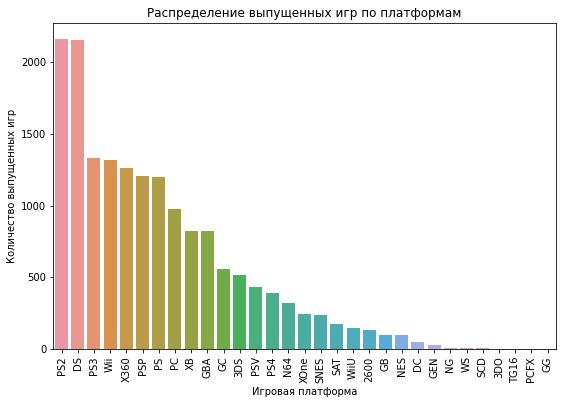

In [ ]:
sns.countplot(x=df['platform'],
             data=df,
             order = df['platform'].value_counts().index)
plt.xlabel('Игровая платформа')
plt.ylabel('Количество выпущенных игр')
plt.xticks(rotation=90)
plt.title('Распределение выпущенных игр по платформам')
plt.show()

### Рассмотрим `year_of_release`

In [ ]:
df[df['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Данные пропущенны по разным играм, игровым платформам и жанрам. Так как многие игры выходят сразу же на нескольких платформах, то заполним пропуски по годам датой релиза на других платформах.

In [ ]:
round(df['year_of_release'].isna().sum() / len(df) * 100, 2)

1.61

Пропуски составляют менее 2%, удалим эти сроки

In [ ]:
df = df.dropna(subset=['year_of_release'])

Преобразуем `year_of_release` в формат `int`

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int16')

### Рассмотрим `na_sales` `eu_sales` `jp_sales` `other_sales`

In [ ]:
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16444.000000,16444.000000,16444.000000,16444.000000
mean,0.264012,0.145930,0.078487,0.047594
std,0.818378,0.506716,0.311100,0.188005
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


Есть выбросы, возможно это культовые игры

### Рассмотрим `critic_score`

In [ ]:
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Оценка находится в диапозоне от 13 до 98, что соответствует исходным требованиям

### Рассмотрим `user_score`

In [ ]:
df['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

Оценка находится в диапозоне от 0 до 10, что соответствует исходным требованиям

### Переведем `user_score` к формату `float`

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

`tbd` означает, что рейтинг еще не определен. Заменим на `NaN`

In [ ]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [ ]:
df['user_score'] = df['user_score'].astype(float)

In [ ]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# 3. Исселодовательский анализ данных

### Распределение выпущенных игр по годам

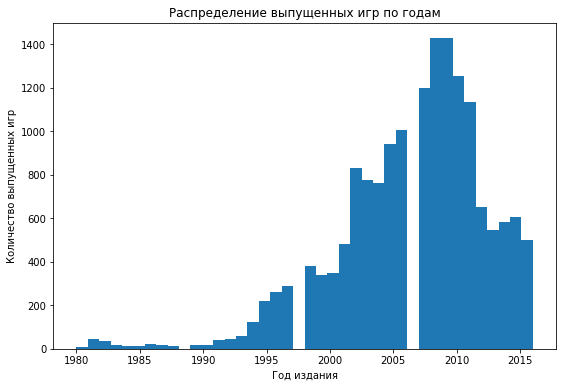

In [ ]:
df['year_of_release'].plot(kind='hist', bins=40);
plt.title('Распределение выпущенных игр по годам');
plt.xlabel('Год издания');
plt.ylabel('Количество выпущенных игр');

Первые игры начали появляться в 80-е, но до начала 00-х выпускались в небольших количествах. В 00-е произошёл бурный рост, думаю это связано с тем, что компьютеры и игровые приставки стали более достпуными и производительными. Сначала 10-х годов наблюдается спад, думаю это связано со сменой тренда. Производители начали выпускать игры на мобильные устройства.

### Продажи по платформам

Топ 20 платформ с наибольшими продажами за все время

In [ ]:
top_platform = (df.groupby('platform')['total_sales'].agg('sum') \
               .sort_values(ascending=False) \
               .reset_index() \
               .head(20))

In [ ]:
top_platform_index = top_platform['platform']

In [ ]:
df_top_platform = df.query('platform in @top_platform_index') \
    .groupby(['platform', 'year_of_release'])['total_sales'] \
    .agg('sum') \
    .reset_index()

In [ ]:
df_top_platform.head()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


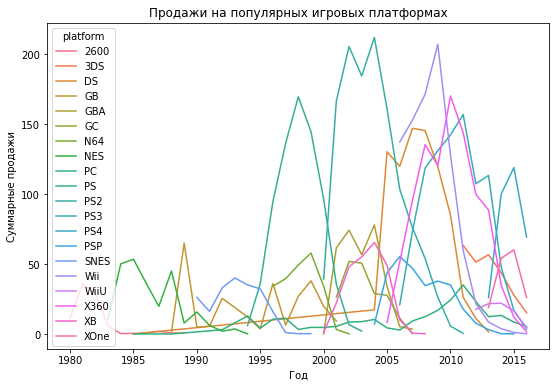

In [ ]:
sns.lineplot(data=df_top_platform, x='year_of_release', y='total_sales', hue='platform');
plt.xlabel('Год');
plt.ylabel('Суммарные продажи');
plt.title('Продажи на популярных игровых платформах');

Судя по графику, игровая платформа популярна 5-7 лет. Рассмотрим подробнее интервал после 2010 года.

In [ ]:
df_top_platform_after_2010 = df_top_platform.query('year_of_release >= 2010')

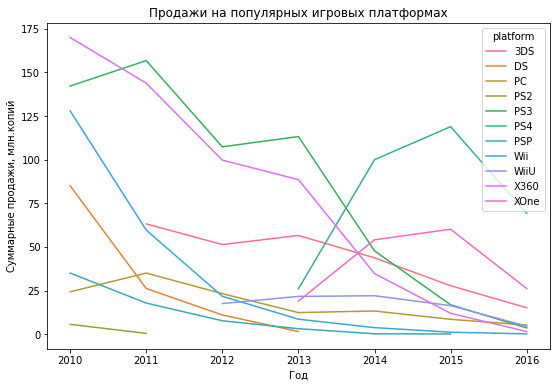

In [ ]:
sns.lineplot(data=df_top_platform_after_2010, x='year_of_release', y='total_sales', hue='platform');
plt.xlabel('Год');
plt.ylabel('Суммарные продажи, млн.копий');
plt.title('Продажи на популярных игровых платформах');

Игровые платформы `DS`, `PS2`, `PS3`, `PSP`, `X360`, `Wii` к 2016 году устарели и им на смену пришли платформы нового поколения: `3DS`, `PS4`, `WiiU`, `XOne`. Для дальнейшего анализа оставим только эти платформы и добавим еще `PC`

In [ ]:
relevant_platforms = ['3DS', 'PS4', 'WiiU', 'XOne', 'PC']

In [ ]:
df_relevant_platforms = df_top_platform.query('platform in @relevant_platforms and year_of_release >= 2014')

Text(0, 0.5, 'Общие продажи')

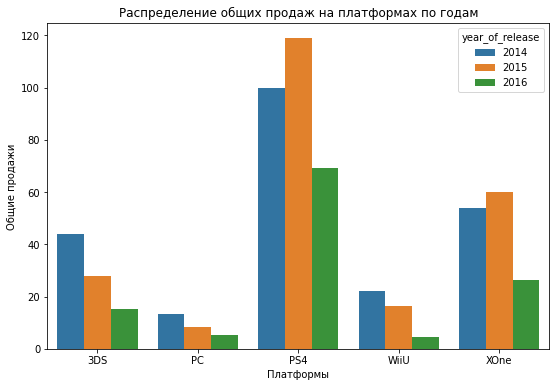

In [ ]:
sns.barplot(x="platform", y="total_sales", hue="year_of_release", data=df_relevant_platforms);
plt.title('Распределение общих продаж на платформах по годам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')

<b> Выводы:
- Спад продаж в 2016 году скорее всего объясняется тем, что информация не полная. Возмодно отображена информация не за весь 2016 год.
- `PS4` и `XOne` демонстрируют рост уровня суммарных продаж с 2013 и являются лидерами по продажам.
- Суммарные продажи `3DS` и `WiiU` падают.
- Суммарные продажи игр на `PC` невысокие (макимум порядка 35 млн копий в 2011 году) и медленно снижаются после 2011г.

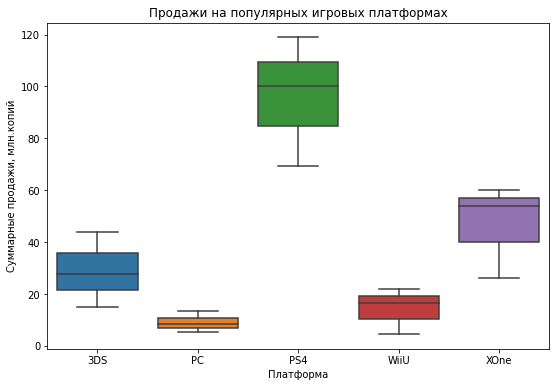

In [ ]:
sns.boxplot(data=df_relevant_platforms, y="total_sales", x='platform');
plt.xlabel('Платформа');
plt.ylabel('Суммарные продажи, млн.копий');
plt.title('Продажи на популярных игровых платформах');

Самая популярная платформа - `PS4`. На общие продажи сильно влияют выбросы особенно на `PS4`. Наибольшее медианной значение по продажам у `PS4`, а наименьшее у `PC`

### Зависимость продаж от оценок критиков и пользователей

In [ ]:
df_PS4 = df.query('platform == "PS4"')
df_PC = df.query('platform == "PC"')
df_XOne = df.query('platform == "XOne"')
df_3DS = df.query('platform == "3DS"')
df_wiiu = df.query('platform == "WiiU"')

In [ ]:
df_PS4['total_sales'].corr(df_PS4['critic_score']).round(2)

0.41

In [ ]:
df_PC['total_sales'].corr(df_PC['critic_score']).round(2)

0.26

In [ ]:
df_XOne['total_sales'].corr(df_XOne['critic_score']).round(2)

0.42

In [ ]:
df_3DS['total_sales'].corr(df_3DS['critic_score']).round(2)

0.35

In [ ]:
df_wiiu['total_sales'].corr(df_wiiu['critic_score']).round(2)

0.35

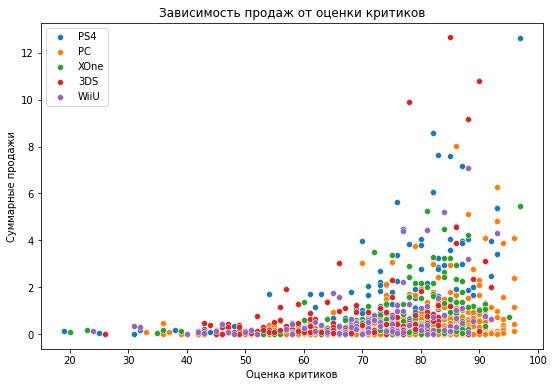

In [ ]:
sns.scatterplot(data=df_PS4, x='critic_score', y='total_sales');
sns.scatterplot(data=df_PC, x='critic_score', y='total_sales');
sns.scatterplot(data=df_XOne, x='critic_score', y='total_sales');
sns.scatterplot(data=df_3DS, x='critic_score', y='total_sales');
sns.scatterplot(data=df_wiiu, x='critic_score', y='total_sales');
plt.title('Зависимость продаж от оценки критиков');
plt.xlabel('Оценка критиков');
plt.ylabel('Суммарные продажи');
plt.legend(['PS4', 'PC', 'XOne', '3DS', 'WiiU']);

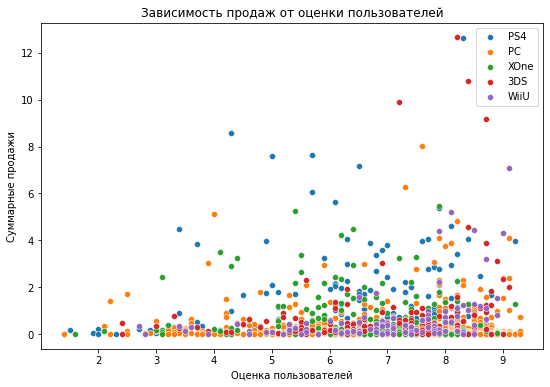

In [ ]:
sns.scatterplot(data=df_PS4, x='user_score', y='total_sales');
sns.scatterplot(data=df_PC, x='user_score', y='total_sales');
sns.scatterplot(data=df_XOne, x='user_score', y='total_sales');
sns.scatterplot(data=df_3DS, x='user_score', y='total_sales');
sns.scatterplot(data=df_wiiu, x='user_score', y='total_sales');
plt.title('Зависимость продаж от оценки пользователей');
plt.xlabel('Оценка пользователей');
plt.ylabel('Суммарные продажи');
plt.legend(['PS4', 'PC', 'XOne', '3DS', 'WiiU']);

In [ ]:
df_PS4['total_sales'].corr(df_PS4['user_score']).round(2)

-0.03

In [ ]:
df_PC['total_sales'].corr(df_PC['user_score']).round(2)

0.01

In [ ]:
df_XOne['total_sales'].corr(df_XOne['user_score']).round(2)

-0.07

In [ ]:
df_3DS['total_sales'].corr(df_3DS['user_score']).round(2)

0.22

In [ ]:
df_wiiu['total_sales'].corr(df_wiiu['user_score']).round(2)

0.4

<b>Вывод:

Присутствует небольшая зависимость общих продаж от оценки критиков, чем выше оценка, тем больше продаж. Общие продажи в целом не зависят от оценки пользователей, но для платформ `3DS` и `WiiU` наблюдается слабая прямая зависимость.

### Общее распределение игр по жанрам

Распределение по жанрам

In [ ]:
df_genre = df.groupby('genre')['genre'].count().sort_values(ascending=False)

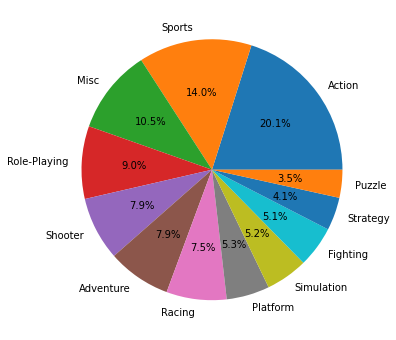

In [ ]:
plt.pie(x=df_genre, labels=df_genre.index, autopct='%.1f%%');

Распределение по продажам

In [ ]:
df_total_sales = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

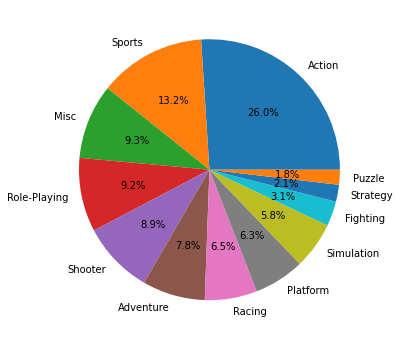

In [ ]:
plt.pie(x=df_total_sales, labels=df_genre.index, autopct='%.1f%%');

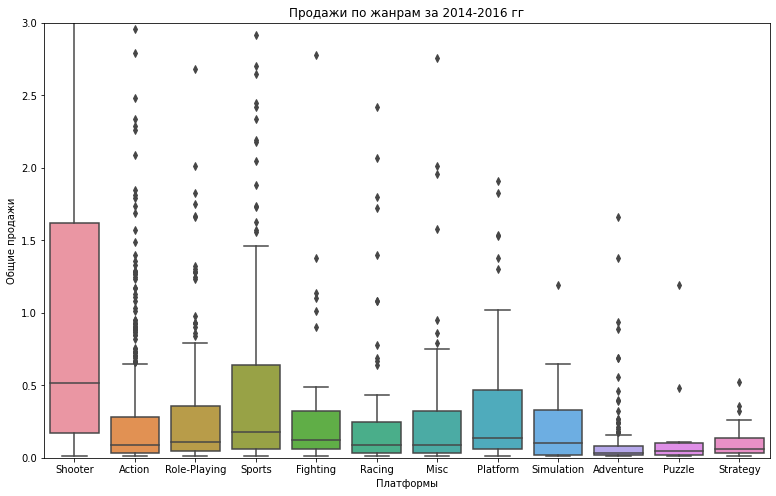

In [ ]:
df = df.query('year_of_release >= 2014')
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

<b>Вывод:
    
Больше всего выпускается игр в жанре `Action`, они имеют и самые высокие продажи. В целом суммарные продажи пропорциональны количеству выпущенных игр.

# Шаг 4. Составьте портрет пользователя каждого региона

In [ ]:
df_top_genre = df.query('year_of_release >= 2010') \
                    .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']] \
                    .agg('sum') \
                    .apply(lambda x: round((x / x.sum()), 2))

In [ ]:
df_top_platform = df.query('year_of_release >= 2010') \
                    .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']] \
                    .agg('sum') \
                    .apply(lambda x: round((x / x.sum()), 2))

In [ ]:
df_top_genre_na_sales = pd.DataFrame(df_top_genre['na_sales'].sort_values(ascending=False).head(5))
df_top_genre_eu_sales = pd.DataFrame(df_top_genre['eu_sales'].sort_values(ascending=False).head(5))
df_top_genre_jp_sales = pd.DataFrame(df_top_genre['jp_sales'].sort_values(ascending=False).head(5))

In [ ]:
df_top_platform_na_sales = pd.DataFrame(df_top_platform['na_sales'].sort_values(ascending=False).head(5))
df_top_platform_eu_sales = pd.DataFrame(df_top_platform['eu_sales'].sort_values(ascending=False).head(5))
df_top_platform_jp_sales = pd.DataFrame(df_top_platform['jp_sales'].sort_values(ascending=False).head(5))

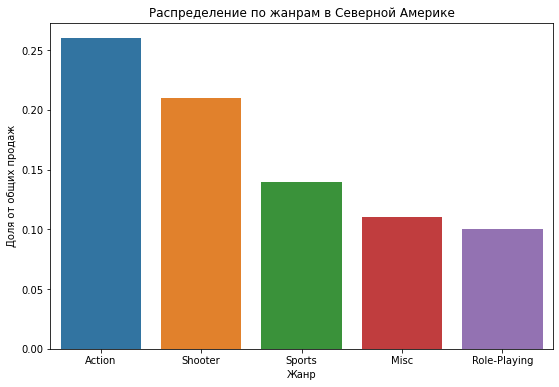

In [ ]:
sns.barplot(data=df_top_genre_na_sales, x=df_top_genre_na_sales.index, y=df_top_genre_na_sales['na_sales']);
plt.title('Распределение по жанрам в Северной Америке');
plt.xlabel('Жанр');
plt.ylabel('Доля от общих продаж');

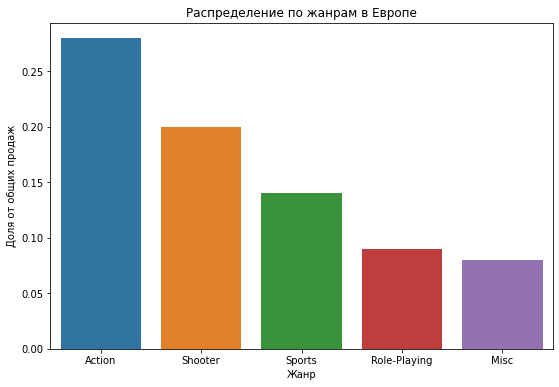

In [ ]:
sns.barplot(data=df_top_genre_eu_sales, x=df_top_genre_eu_sales.index, y=df_top_genre_eu_sales['eu_sales']);
plt.title('Распределение по жанрам в Европе');
plt.xlabel('Жанр');
plt.ylabel('Доля от общих продаж');

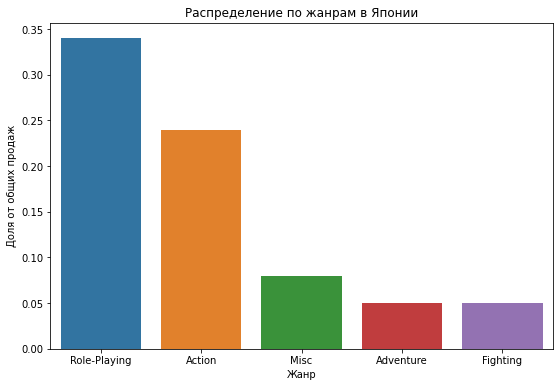

In [ ]:
sns.barplot(data=df_top_genre_jp_sales, x=df_top_genre_jp_sales.index, y=df_top_genre_jp_sales['jp_sales']);
plt.title('Распределение по жанрам в Японии');
plt.xlabel('Жанр');
plt.ylabel('Доля от общих продаж');

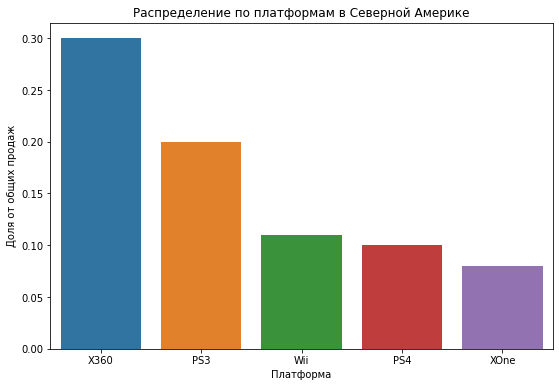

In [ ]:
sns.barplot(data=df_top_platform_na_sales, x=df_top_platform_na_sales.index, y=df_top_platform_na_sales['na_sales']);
plt.title('Распределение по платформам в Северной Америке');
plt.xlabel('Платформа');
plt.ylabel('Доля от общих продаж');

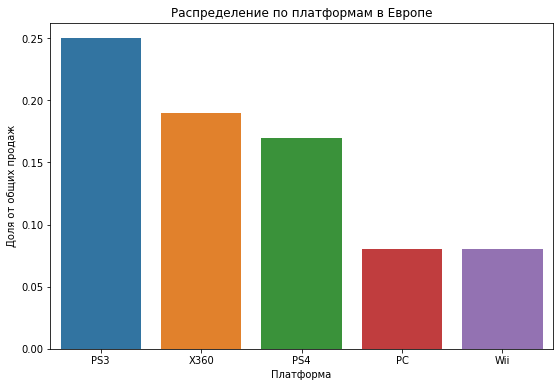

In [ ]:
sns.barplot(data=df_top_platform_eu_sales, x=df_top_platform_eu_sales.index, y=df_top_platform_eu_sales['eu_sales']);
plt.title('Распределение по платформам в Европе');
plt.xlabel('Платформа');
plt.ylabel('Доля от общих продаж');

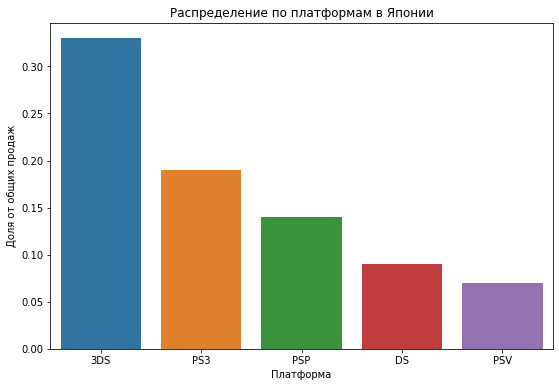

In [ ]:
sns.barplot(data=df_top_platform_jp_sales, x=df_top_platform_jp_sales.index, y=df_top_platform_jp_sales['jp_sales']);
plt.title('Распределение по платформам в Японии');
plt.xlabel('Платформа');
plt.ylabel('Доля от общих продаж');

<b>Вывод:
    
Предпочтения по жанрам игр в Северной Америке и Европе совпадают, самыми популярными являются Action, Shooter и Sports. А вот в Японии популярны игры жанра Role-Playing и Action. Европейский и Северо-Американский рынки отражают глобальную тенденцию касаемо жанров. Отличие японоского рынка может быть обусловлено ментальностью игроков и развитого внутреннего рынка. В разрезе приставок в Северной Америке наиболее популярны XBox и PS3/PS4, в Европе аналогично, но большее предпочтение игроки отдают приставкам PS. В Японии же кроме PS популярны платформы серии DS.

In [ ]:
df_top_rating = df.query('year_of_release >= 2010') \
                    .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']] \
                    .agg('sum') \
                    .apply(lambda x: round((x / x.sum()), 2))

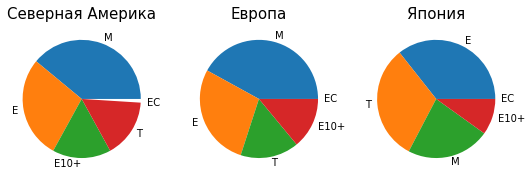

In [ ]:
df_top_rating_na = df_top_rating['na_sales'].sort_values(ascending=False).head(5)
ax1 = plt.subplot(131)
plt.pie(df_top_rating_na, labels=df_top_rating_na.index)
ax1.set_title('Северная Америка', fontsize=15)

df_top_rating_eu = df_top_rating['eu_sales'].sort_values(ascending=False).head(5)
ax2 = plt.subplot(132)
plt.pie(df_top_rating_eu, labels=df_top_rating_eu.index)
ax2.set_title('Европа', fontsize=15)

df_top_rating_jp = df_top_rating['jp_sales'].sort_values(ascending=False).head(5)
ax3 = plt.subplot(133)
plt.pie(df_top_rating_jp, labels=df_top_rating_jp.index)
ax3.set_title('Япония', fontsize=15)
plt.show()

<b>Вывод:
    
В Северной Америке и Европе наиболее популярны возрастные группы М (для лиц старше 17 лет) и Е (для всех возрастов). В Японии же популярны категории Е (для всех возрастов) и Т (для лиц старше 13 лет). Возможно различия связаны с тем, что в СА и Европе более популярны игры жанра Action и Shooter в которых выше ограничения по возрасту, а в Японии популярен жанр RPG, где возрастные ограничения ниже или отсутствуют.

# Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<b>Проверим гипотезу:</b> "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

<b>Нулевая гипотеза H0:</b> "Средний пользовательский рейтинг игр на платформе Xbox One равен среднему пользовательскому рейтингу на платформе PC".

<b>Альтернативная гипотеза H1:</b> "Средний пользовательский рейтинг игр на платформе Xbox One не равна среднему пользовательскому рейтингу на платформе PC".

Определим уровень значимости `alpha` = 0.05

Выборки оценок по платформам XOne и PC не связаны друг с другом. Для расчёта статистики разности и `p-value` воспользуемся критерием Стьюдента.

In [ ]:
df_pc_score = df.loc[(df['platform'] == 'PC') & (~df['user_score'].isna()) & (df['year_of_release'] >= 2014)]['user_score']

In [ ]:
df_xbox_score = df.loc[(df['platform'] == 'XOne') & (~df['user_score'].isna()) & (df['year_of_release'] >= 2014)]['user_score']

In [ ]:
results_platform = st.ttest_ind(df_pc_score, df_xbox_score)
alpha = 0.05

In [ ]:
print('p-значение:', results_platform.pvalue)
if (results_platform.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action  и Sports разные

<b>Проверим гипотезу:</b> "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

<b>Нулевая гипотеза H0:</b> "Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу Sports".

<b>Альтернативная гипотеза H1:</b> "Средний пользовательский рейтинг жанра Action не равна среднему пользовательскому рейтингу Sports".

Определим уровень значимости `alpha` = 0.05

Выборки оценок по жанрам Action и Sports не связаны друг с другом. Для расчёта статистики разности и `p-value` воспользуемся критерием Стьюдента.

In [ ]:
df_action_score = df.loc[(df['genre'] == 'Action') & (~df['user_score'].isna()) & (df['year_of_release'] >= 2014)]['user_score']

In [ ]:
df_sports_score = df.loc[(df['genre'] == 'Sports') & (~df['user_score'].isna()) & (df['year_of_release'] >= 2014)]['user_score']

In [ ]:
results_genre = st.ttest_ind(df_action_score, df_sports_score)
alpha = 0.05

In [ ]:
print('p-значение:', results_genre.pvalue)
if (results_genre.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


# Вывод

1. В рамках проекта была проведена предобработка данных. Обработаны и исследованы пропуски, в некоторых столбцах доля пропусков достигает 50% и более, эти столбцы оставлены без изменения. Возможные причины пропусков - отсутствие информации при сборе данных или сбой в системе при выгрузке таблицы из базы данных


2. Первые игры начали появляться в 80-е, но до начала 00-х выпускались в небольших количествах. В 00-е произошёл бурный рост продаж, вероятно он связан с тем, что компьютеры и игровые приставки стали более достпуными и производительными. Сначала 10-х годов наблюдается спад, думаю это связано со сменой тренда. Производители переориентировались на мобильные устройства.


3. Определен срок "жизни" игровых платформ, который составляет 5-8 лет. Выделена основные популярные платформы на 2016 год `PS4`, `3DS`, `XOne`, `WiiU`, `PC`. Выделен актуальный период для исследования игр с 2014 по 2016 год. Лидером по суммарным продажам является PS4.


4. Между глобальными продажами и оценками критиков наблюдается небольшая корреляция. С другой стороны корреляции между продажами и оценкой пользователей не такая явная и наблюдается только для платформ `3DS` и `WiiU`.


5. Рассмотрено влияние жанра игры на продажи. Самыми популярными и продаваемыми жанроми являются `Action`, `Sports` и `Misc`. Наименее продаваемыми являются жанры `Puzzle`, `Fighting` и `Strategy`.


6. Найдены ТОП-5 платформ с максимальными долями продаж для Северной Америки, Европы и Японии. Для Европы и Северной Америки предпочтения в игровых платформах схожи. В ТОП-5 разные поколения `PS`, `Wii` и `Xbox`. В Японии же популярны `PS` и `DS`. Определены ТОП-5 жанров с максимальными долями продаж для Северной Америки, Европы и Японии. Для Европы и Северной Америки данные практически не отличаются `Action`, `Shooter`, `Sports`, `Role-Playing` и `Misc`. В Японии же популярны `Role-Playing`, `Action`, `Misc`, `Fighting` и `Adventure`. Скорре всего это связано с ментальностью игроков и наличие развитого внутреннего рынка.


7. Проанализирована зависимость уровня продаж от рейтинга ESRB в каждом регионе. Для Европы и Северной Америки большинство игр покупают с рейтингом 'M' (17+) и 'Е' (без ограничений). Возможно это связано с запросом игроков на взрослый контент в играх и желанием компаний охватывать максимальное количество возрастных групп. В Японии большую часть игр покупают для детей и подростков категории 'E' и 'T'.


8. Проверено 2 гипотезы.
- Первая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтвердилась.
- Вторая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports одинаковые" оказалась неверна.